In [89]:
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import scipy.linalg as lng
import matplotlib

In [45]:
data = pd.read_csv(r'M:\Documents\Courses\Credits\2019August\Module1\Exercises 1\Exercises 1\Python\DiabetesData.txt', sep=",",)
Y = data.Y

data.drop(['Y'], axis=1, inplace=True)

In [46]:
# normalize the data
data_norm = (data-data.mean())/(data.std()) 

# Question1

In [47]:
# 1(a)
# solve it using basic equation:
# beta = (X_t*X)-1*X_t*y

inv = np.linalg.inv(np.dot(data_norm.transpose(),data_norm))
inv_ = np.dot(inv, data_norm.transpose())
beta1 = np.dot(inv_, Y)

In [48]:
# 1(b)
# solve it using linear equations
M = np.c_[np.ones(len(Y)),data_norm]
beta2, res, rnk, s = lng.lstsq(M, Y)


In [50]:
# 1(c)
MSE = 1/len(Y)*np.mean((Y-np.matmul(M,beta2)**2))

In [95]:
# 1(d)
RSS = np.mean((Y-np.matmul(M,beta2))**2)
TSS = np.mean((Y-np.mean(Y))**2)

R_sq = 1-RSS/TSS


2859.6963475867474 5929.884896910383
0.5177484222203503


# Question2

In [9]:


mu, sigma = 0, 1 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 10)
s2 = np.random.normal(mu, sigma, 10)
s3 = np.random.normal(mu, sigma, 10)


X = np.array([[s1],[s2],[s3]])
X = X.reshape((3,10))
X = X.transpose()
B_true = [1, 2, 3]



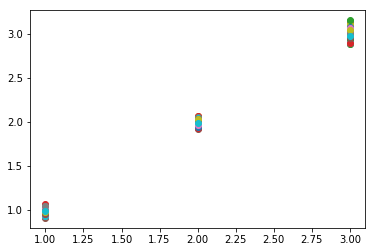

In [73]:
# 2(a)


for i in range(0,100):

    mu_e, sigma_e = 0,0.1
    e = np.random.normal(mu_e, sigma_e, 10)

    y = np.matmul(X, B_true) + e
    
    # solve it using linear equations
    #M = np.c_[np.ones(len(y)),X]
    #beta, res, rnk, s = lng.lstsq(M, y)
    #plt.plot(B_true, beta[1:], 'o')
    
    inv = np.linalg.inv(np.dot(X.transpose(),X))
    inv_ = np.dot(inv, X.transpose())
    beta = np.dot(inv_, y)
    
    #print(beta)
    plt.plot(B_true, beta, 'o')
    
    

the plot shows low bias but high variance

# Question3

Text(0,0.5,'beta ridge')

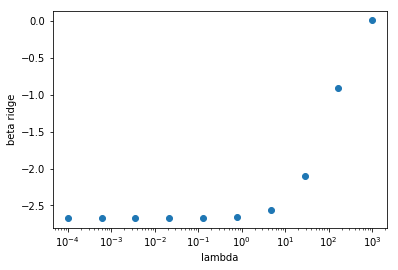

In [80]:
# 3(b)
data_np = np.reshape(np.array(data.values), (len(data), len(data.columns)))

lambda_ = np.logspace(-4, 3, num=10)
beta_ridge_list = list()

for lambda_value in lambda_:
    
    
    inv = np.linalg.inv(np.dot(data_np.transpose(),data_np) + lambda_value*np.identity(len(data.columns)))
    inv_ = np.dot(inv, data_np.transpose())
    beta_ridge = np.dot(inv_, Y)
    beta_ridge_list.append(beta_ridge)
    
plt.semilogx(lambda_, np.mean(beta_ridge_list, axis=1), 'o')
plt.xlabel('lambda')
plt.ylabel('beta ridge')

Beta goes towards 0 with increasing lambda (increasing complexity), since lambda is in the inverse

<ErrorbarContainer object of 3 artists>

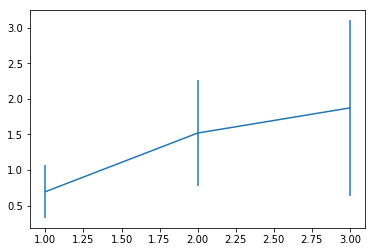

In [91]:
# 3(c)

lambda_ = np.logspace(-4, 3, num=10)

beta_ridge_list = list()

for lambda_value in lambda_:
    
    
    inv = np.linalg.inv(np.dot(X.transpose(),X) + lambda_value*np.identity(len(B_true)))
    inv_ = np.dot(inv, X.transpose())
    beta_ridge = np.dot(inv_, y)
    beta_ridge_list.append(beta_ridge)
    
plt.errorbar(B_true, np.mean(beta_ridge_list, axis=0), yerr=np.std(beta_ridge_list, axis=0), label=lambda_value)

this plot has high bias and  variance

# Question4

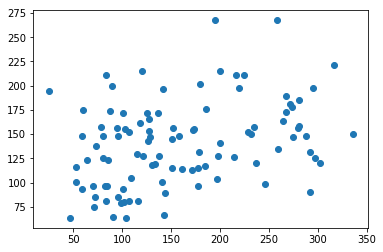

In [110]:
neigh = KNeighborsRegressor(n_neighbors=2)
y_knn = neigh.fit(data_norm[0:100], Y[0:100]).predict(data_norm[100:200])

#knn.fit(X, y).predict(T)

plt.plot(Y[100:200], y_knn, 'o')


4917.132499999999
4694.16942222222
4844.347300000001


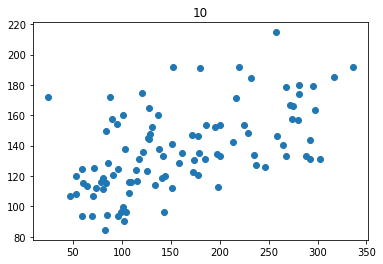

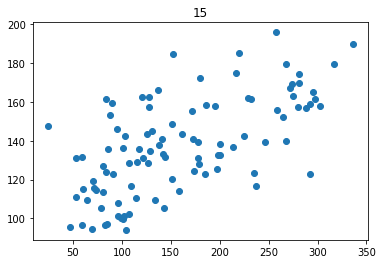

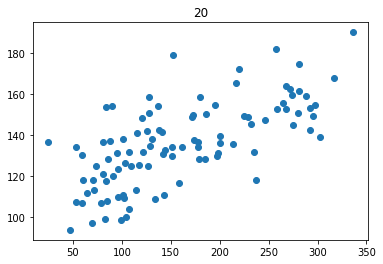

In [93]:
# 4()
for neighbour in range(10, 25, 5):
    neigh = KNeighborsRegressor(n_neighbors=neighbour)
    y_knn = neigh.fit(data_norm[0:100], Y[0:100]).predict(data_norm[100:200])
    
    print(np.mean((Y[100:200]-y_knn)**2))
    
    plt.figure()
    plt.plot(Y[100:200], y_knn, 'o')
    plt.title(neighbour)